In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Read pickle file
with open('/home/oslumbers/Documents/git_repos/HEBO/HEBO/hebo/ensemble_code/results/breast_cancer/num_ens_1.p', 'rb') as f:
    x1 = pickle.load(f)

with open('/home/oslumbers/Documents/git_repos/HEBO/HEBO/hebo/ensemble_code/results/breast_cancer/num_ens_2.p', 'rb') as f:
    x2 = pickle.load(f)

with open('/home/oslumbers/Documents/git_repos/HEBO/HEBO/hebo/ensemble_code/results/breast_cancer/num_ens_3.p', 'rb') as f:
    x3 = pickle.load(f)

In [61]:
seed_bests = []
for i in range(20):
    bests = []
    best = x1[i][0]['metric'].values[0]
    bests.append(best)
    for j in range(1,16):
        val = x1[i][0]['metric'].values[j]
        if val > best:
            best = val
        bests.append(best)
    seed_bests.append(bests)
mean_ens_1 = np.mean(seed_bests, axis=0)
std_ens_1 = np.std(seed_bests, axis=0)


In [62]:
seed_bests = []
for i in range(20):
    bests = []
    best = x2[i][0]['metric'].values[0]
    bests.append(best)
    for j in range(1,16):
        val = x2[i][0]['metric'].values[j]
        if val > best:
            best = val
        bests.append(best)
    seed_bests.append(bests)
mean_ens_2 = np.mean(seed_bests, axis=0)
std_ens_2 = np.std(seed_bests, axis=0)

In [63]:
seed_bests = []
for i in range(20):
    bests = []
    best = x3[i][0]['metric'].values[0]
    bests.append(best)
    for j in range(1,16):
        val = x3[i][0]['metric'].values[j]
        if val > best:
            best = val
        bests.append(best)
    seed_bests.append(bests)
mean_ens_3 = np.mean(seed_bests, axis=0)
std_ens_3 = np.std(seed_bests, axis=0)

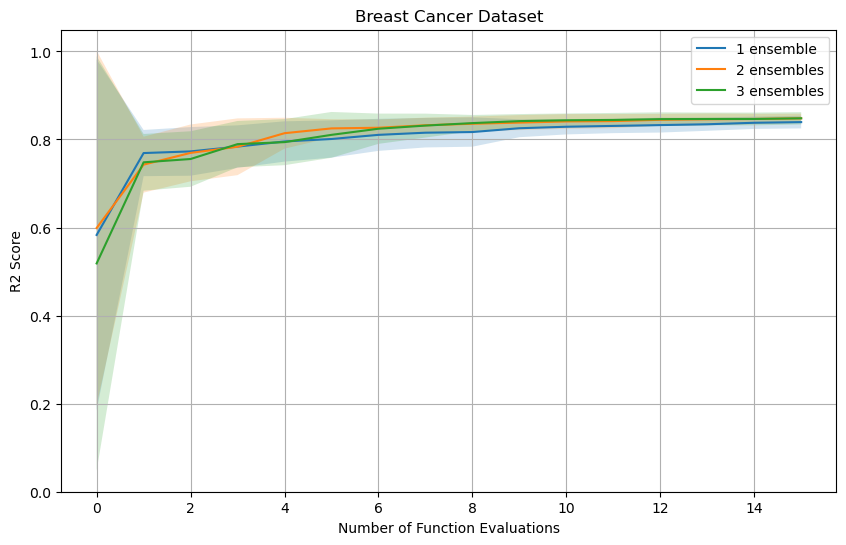

In [64]:
fig = plt.figure(figsize=(10, 6))
plt.plot(mean_ens_1, label='1 ensemble')
plt.fill_between(np.arange(16), mean_ens_1 - std_ens_1, mean_ens_1 + std_ens_1, alpha=0.2)
plt.plot(mean_ens_2, label='2 ensembles')
plt.fill_between(np.arange(16), mean_ens_2 - std_ens_2, mean_ens_2 + std_ens_2, alpha=0.2)
plt.plot(mean_ens_3, label='3 ensembles')
plt.fill_between(np.arange(16), mean_ens_3 - std_ens_3, mean_ens_3 + std_ens_3, alpha=0.2)
plt.legend()

plt.xlabel('Number of Function Evaluations')
plt.ylabel('R2 Score')
#plt.ylim(0.5, 1)
plt.title('Breast Cancer Dataset')
plt.grid()

plt.savefig('results/plots/breast_cancer_plot.pdf')
